## Observations
- The bar graph showing mean sentiment score varies from day to to day. On June 25, the New York Times and CNN scores were closest to neutral, and all news sources showed scores on the negative side of the scale. It was a bad day, perhaps. On June 26, Fox News is the only one to show a positive score, while BBC and NYT are closest to neutral. 
- The scatterplot of tweet sentiment over time displays a pattern of sentiment cluster around the '0.0' score indicating neutrality. Other than that cluster of neutrality, which one might expect given the values of journalism to present balanced information, the pattern is random. All sources have dots everywhere, and we don't see a difference over time. There are more dots in the negative part of the plot, which, at a guess, may be due to the charged issue of separating families at the U.S. border. The scatterplot looked much the same on June 25 as it did on June 26. 

In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
users = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']


bbc_list = []
cbs_list = []
cnn_list = []
fox_list = []
nyt_list = []

for status in tweepy.Cursor(api.user_timeline, id='BBCworld').items(100):
    bbc_list.append(status)

for status in tweepy.Cursor(api.user_timeline, id='CBSNews').items(100):
    cbs_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='CNN').items(100):
    cnn_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='FoxNews').items(100):
    fox_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='nytimes').items(100):
    nyt_list.append(status)

In [4]:
bbcdf = pd.DataFrame([x._json for x in bbc_list])[['user', 'text', 'created_at']]

In [5]:
bbcdf['name'] = bbcdf.user.map(lambda x: x.get('name'))

In [6]:
tweets_ago = pd.Series(list(range(1,101)))

In [7]:
bbcdf['tweets_ago'] = tweets_ago.values

In [8]:
bbcdf.tail()

,user,text,created_at,name,tweets_ago
95,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",RT @BBCSport: GOAL! Uruguay 1-0 Russia. \n\nLu...,Mon Jun 25 14:12:13 +0000 2018,BBC News (World),96
96,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",RT @BBCSport: Pride is at stake...\n\nWho's en...,Mon Jun 25 14:07:45 +0000 2018,BBC News (World),97
97,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",RT @BBCSport: Underway between #URU and #RUS. ...,Mon Jun 25 14:07:38 +0000 2018,BBC News (World),98
98,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Rotterdam oil spill: Hundreds of birds hit aft...,Mon Jun 25 13:19:00 +0000 2018,BBC News (World),99
99,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",RT @BBCSteveR: We’re in Samara for Russia v Ur...,Mon Jun 25 12:23:15 +0000 2018,BBC News (World),100


In [9]:
cbsdf = pd.DataFrame([x._json for x in cbs_list])[['user', 'text', 'created_at']]
cbsdf['name'] = cbsdf.user.map(lambda x: x.get('name'))
cbsdf['tweets_ago'] = tweets_ago.values

In [10]:
cbsdf.head()

,user,text,created_at,name,tweets_ago
0,"{'id': 15012486, 'id_str': '15012486', 'name':...",Bank of America allegedly is neglecting basic ...,Tue Jun 26 22:17:01 +0000 2018,CBS News,1
1,"{'id': 15012486, 'id_str': '15012486', 'name':...",The NYPD made an eighth arrest in the fatal st...,Tue Jun 26 22:00:58 +0000 2018,CBS News,2
2,"{'id': 15012486, 'id_str': '15012486', 'name':...","HHS official says 2,047 children who were sepa...",Tue Jun 26 21:45:30 +0000 2018,CBS News,3
3,"{'id': 15012486, 'id_str': '15012486', 'name':...","In its decision to uphold the travel ban, the ...",Tue Jun 26 21:30:56 +0000 2018,CBS News,4
4,"{'id': 15012486, 'id_str': '15012486', 'name':...","Authorities are responding to reports of a ""ve...",Tue Jun 26 21:15:44 +0000 2018,CBS News,5


In [11]:
cnndf = pd.DataFrame([x._json for x in cnn_list])[['user', 'text', 'created_at']]
cnndf['name'] = cnndf.user.map(lambda x: x.get('name'))
cnndf['tweets_ago'] = tweets_ago.values

foxdf = pd.DataFrame([x._json for x in fox_list])[['user', 'text', 'created_at']]
foxdf['name'] = foxdf.user.map(lambda x: x.get('name'))
foxdf['tweets_ago'] = tweets_ago.values

nytdf = pd.DataFrame([x._json for x in nyt_list])[['user', 'text', 'created_at']]
nytdf['name'] = nytdf.user.map(lambda x: x.get('name'))
nytdf['tweets_ago'] = tweets_ago.values

In [12]:
combined_df = pd.concat([bbcdf, cbsdf, cnndf, foxdf, nytdf])

In [13]:
combined_df.tail()

,user,text,created_at,name,tweets_ago
95,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",A plan to build an AirTrain between Manhattan ...,Tue Jun 26 04:58:28 +0000 2018,The New York Times,96
96,"{'id': 807095, 'id_str': '807095', 'name': 'Th...","5 years ago, the Supreme Court struck down a k...",Tue Jun 26 04:42:03 +0000 2018,The New York Times,97
97,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",RT @nytopinion: In Episode One of @realtrumpbi...,Tue Jun 26 04:22:04 +0000 2018,The New York Times,98
98,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",Five Takeaways From Turkey’s Election https://...,Tue Jun 26 04:11:25 +0000 2018,The New York Times,99
99,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",Amid increasing concerns about privacy violati...,Tue Jun 26 04:02:02 +0000 2018,The New York Times,100


In [14]:
from sklearn.utils import shuffle

In [15]:
shuffled = shuffle(combined_df)

In [16]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(some_text):
    return analyzer.polarity_scores(some_text)

In [17]:
shuffled['sent'] = shuffled.text.map(get_sentiment)

shuffled['pos']= shuffled.sent.map(lambda x :x.get('pos'))
shuffled['neg']= shuffled.sent.map(lambda x :x.get('neg'))
shuffled['neu']= shuffled.sent.map(lambda x :x.get('neu'))
shuffled['compound']= shuffled.sent.map(lambda x :x.get('compound'))

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [18]:
shuffled.tail()

,user,text,created_at,name,tweets_ago,sent,pos,neg,neu,compound
66,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",Could pills soon replace insulin shots for dia...,Tue Jun 26 11:16:12 +0000 2018,CNN,67,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
32,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",The 55 most over-the-top lines from Donald Tru...,Tue Jun 26 16:51:27 +0000 2018,CNN,33,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
36,"{'id': 1367531, 'id_str': '1367531', 'name': '...",.@POTUS admin bids to save coal plant by forci...,Tue Jun 26 18:16:28 +0000 2018,Fox News,37,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.176,0.0,0.824,0.4939
15,"{'id': 1367531, 'id_str': '1367531', 'name': '...",THURSDAY: @BretBaier and @marthamaccallum mode...,Tue Jun 26 20:35:05 +0000 2018,Fox News,16,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
70,"{'id': 807095, 'id_str': '807095', 'name': 'Th...","Jimmy Fallon responds to President Trump: ""You...",Tue Jun 26 11:30:12 +0000 2018,The New York Times,71,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [19]:
shuffled[['pos', 'neg', 'neu']].describe()

,pos,neg,neu
count,500.000000,500.000000,500.000000
mean,0.083868,0.112022,0.804110
std,0.110780,0.127113,0.160923
min,0.000000,0.000000,0.323000
25%,0.000000,0.000000,0.689500
50%,0.000000,0.095000,0.816000
75%,0.159250,0.200000,1.000000
max,0.485000,0.675000,1.000000


In [20]:
dfbar = shuffled[['name', 'compound']]

In [21]:
dfbar = dfbar.groupby('name').mean()

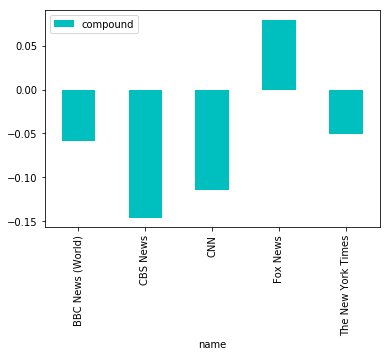

In [22]:
dfbar.plot.bar(color='c');

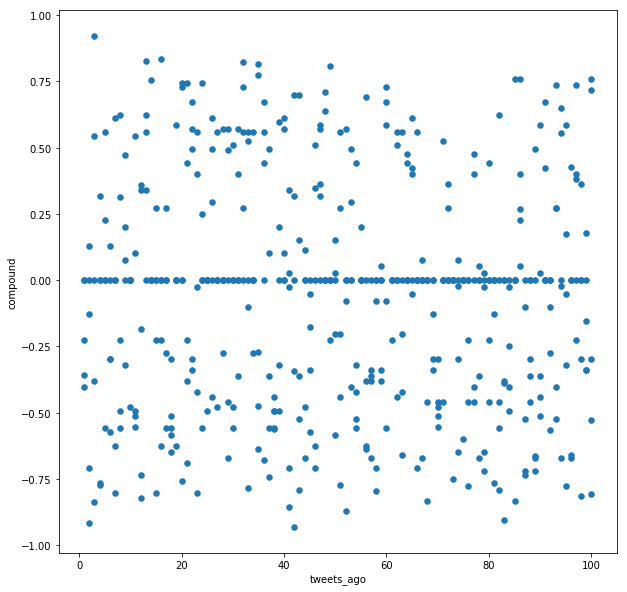

In [23]:
shuffled.plot.scatter(x='tweets_ago', y='compound', figsize=(10,10), s=30);

In [24]:
import seaborn as sns

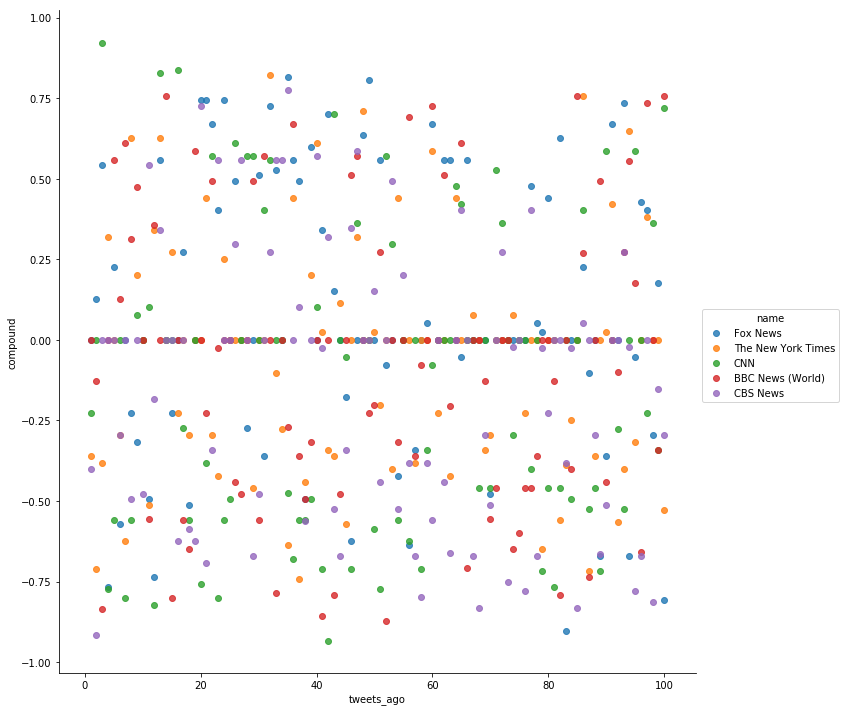

In [25]:
sns.lmplot( x="tweets_ago", y="compound", data=shuffled, fit_reg=False, hue='name', size=10, legend_out=True);